<center><h2> CPE 4040 Spring 2023: Homework #6</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or AI's) codes.__

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.
 * Deadline: 11:59 pm, 3/29 (Wednesday)

In [1]:
import pandas as pd
import numpy as np

<h2>Q1: Revisiting the Apple Store (30 Points)</h2>

<h4>It is time to revisit the AppleStore dataset that we worked on earlier in the semester. </h4>

<h4>Use what you learn from pandas, answer the following questions.</h4>

<h3>1. Import the dataset AppleStore.csv and assign a DataFrame called 'df_apps'.</h3>
<h4>How many rows and columns in the dataset? What are the row index and column labels?</h4>
<h4>Print the first 5 lines of the dataset.</h4>

In [2]:
df_apps = pd.read_csv('AppleStore.csv')

In [3]:
#Displays first 5 rows
df_apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


<h3>2. Counting genres: how many different genres in "prime_genre"?</h3>
<h3>How many titles are in each genre? (Hint: use value_counts method)</h3>

In [4]:
#The length of what comes from value_counts is the amount.
print(len(df_apps['prime_genre'].value_counts()))

23


<h3>3. Content rating: how many different categories of 'content_rating'?</h3>
<h3>What percentage of titles are in each category?</h3>

In [5]:
#Will find the amount in each category
ratingCount = df_apps['cont_rating'].value_counts()

#Calulates the percentage of each rating
ratingPercentages = ratingCount / len(df_apps) * 100
print(ratingPercentages.round(2))

4+     61.60
12+    16.05
9+     13.71
17+     8.64
Name: cont_rating, dtype: float64


<h3>4. Solve a simiar problem as in Homework #3: Use GroupBy to find the distribution of rating in each genre.</h3>
    <h4>a. How many apps in 'Games' are for age 17 and above?</h4>
    <h4>b. How many apps in 'Education' are for kids 9 years and older?</h4>

In [6]:
appGroup = df_apps.groupby(['prime_genre', 'cont_rating'])
appAndRating = appGroup.size()

gamesSeventeenUp = appAndRating.loc[('Games', '17+')]
eduNineUp = appAndRating.loc[('Education', '9+')]

print("Amount of 17+ Games:", gamesSeventeenUp)
print("Amount of 9+ Educational Apps:", eduNineUp)

Amount of 17+ Games: 177
Amount of 9+ Educational Apps: 6


<h3>5. How many apps are free? What is the title of the most expensive app?</h3> 

In [7]:
#Will find all the apps that have a price of $0 by filtering them
freeApps = len(df_apps[df_apps['price'] == 0])

#Will go to price and go to the highest by going to the index with the highest value and display the name of the app.
mostExpensive = df_apps.loc[df_apps['price'].idxmax()]['track_name']

print("Number of Free apps =", freeApps)
print("Most expensive app is:", mostExpensive)

Number of Free apps = 4056
Most expensive app is: LAMP Words For Life


<h2>Q2: Practicing GroupBy and Data Aggregation (30 Points)</h2>

<h3>1. Import the dataset from the URL. This is a set of statistics of age, gender and occupation.</h3>
<h3> How many different occupations are in the dataset?

In [8]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [9]:
#Displays the number of different occupations
len(users['occupation'].value_counts())

21

<h3>2.1 There is a column label, zip_code, which will not be used in this exercise.</h3>
<h3>Please remove the column from the DataFrame</h3>

In [10]:
#Removes the zip_code column and displays the first 5 columns to verify.
users = users.drop('zip_code', axis=1)
users.head()

,age,gender,occupation
user_id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other


<h3>2.2 As you may have noticed, there is an occupation called "retired".</h3>
<h3>Please remove the users whose occupation is "retired" from the DataFrame.</h3>

In [11]:
#Will go through the occupation column and removes the retired users.
users = users[users['occupation'] != 'retired']

<h3>3. Calculate the average age for each occupation. What are the top 5 youngest occupation groups?</h3>
<h3>Hint: use sort_values() method. </h3>

In [12]:
#Will find the average of each occupation and findthe mean of the adges
averageAge = users.groupby('occupation')['age'].mean()
#This will sort the ages from highest to lowest value
sortedAge = averageAge.sort_values()
#Will display the 5 youngest occupation groups
sortedAge.head()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
Name: age, dtype: float64

<h3>4. Calculate the female ratio for each occupation and sort it in ascending order.</h3>

<h3>5. For each occupation, calculate the minimum and maximum ages.</h3>

In [13]:
#Filters the users out and creates a new column called females
users['Females'] = (users['gender'] == 'F')

#Will go through the occupation and find the mean of females in each occupation
femaleRatio = users.groupby('occupation')['Females'].mean()

#Sorts the values in ascending order
femaleRatio.sort_values(ascending=True)

occupation
doctor           0.000000
engineer         0.029851
technician       0.037037
programmer       0.090909
executive        0.093750
scientist        0.096774
entertainment    0.111111
lawyer           0.166667
salesman         0.250000
educator         0.273684
student          0.306122
other            0.342857
marketing        0.384615
writer           0.422222
none             0.444444
administrator    0.455696
artist           0.464286
librarian        0.568627
healthcare       0.687500
homemaker        0.857143
Name: Females, dtype: float64

<h3>6. For each combination of occupation and gender, calculate the mean age.</h3>
<h3>Hint: This will require you to pass two column labels to Groupby.</h3>

In [14]:
#Will group the occupation and gender and display the average age across both genders for each occupation
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

<h2>Q3: Historical Stock Price (40 Points)</h2>

<h3>You will reuse the stock historical data in Homework 5 to explore some common stock price performace measures.</h3> 

__In particualr, you will work on:__

    1. 52-Week Range
    2. Yearly Performance Summary
    3. Yearly Investment Results

<h3>Import the stock historical data that you used for Homework 5.</h3>
<h4>Note: Remember to clean up the dollars signs and the datetime format of the dataset before proceeding.</h4>

In [15]:
df = pd.read_csv(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4040\HW5\HistoricalData_GME.csv')

In [16]:
#Cleans the dollar signs
df['Open'].str.strip("$")
col = ['Close/Last', 'Open', 'High', 'Low']

for c in col:
    df[c] = df[c].str.strip('$')

df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/21/2023,17.65,15882850,17.15,18.35,17.14
1,03/20/2023,16.87,4463676,16.65,17.27,16.25
2,03/17/2023,16.60,5105501,16.62,16.72,15.9193
3,03/16/2023,16.76,4093282,16.00,16.7689,15.53
4,03/15/2023,15.95,4541529,16.50,16.69,15.695


In [17]:
#Will turn the columns into floats andturns Date into datetime format
df[col] = df[col].astype(float)
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


<h3>Rename the column 'Close/Lst'</h3>

In [18]:
df.rename(columns = {'Close/Last':'Close'}, inplace=True)
df

,Date,Close,Volume,Open,High,Low
0,2023-03-21,17.6500,15882850,17.1500,18.3500,17.1400
1,2023-03-20,16.8700,4463676,16.6500,17.2700,16.2500
2,2023-03-17,16.6000,5105501,16.6200,16.7200,15.9193
3,2023-03-16,16.7600,4093282,16.0000,16.7689,15.5300
4,2023-03-15,15.9500,4541529,16.5000,16.6900,15.6950
...,...,...,...,...,...,...
2512,2013-03-28,6.9925,39373408,6.3125,7.1675,6.3125
2513,2013-03-27,6.6125,12135088,6.5700,6.6675,6.5350
2514,2013-03-26,6.5900,14183732,6.4075,6.6000,6.3575
2515,2013-03-25,6.3450,8667416,6.4525,6.5425,6.3012


<h3>1. The 52-Week Range </h3>

The 52-week range refers to the lowest and highest price at which a stock has traded during the previous 52 weeks. In this exercise, we consider the __intraday highs and lows__, that is, the 'High' and 'Low' columns, to find the answer.

#### Note: if the last date of your data is 2023-2-27, then the 52-week range starts at 2022-2-28 and ends at 2023-2-27.
#### Note: if your starting date falls on a non-trading day, then move the date up to the next trading day.

### Write a script to show the 52-week range.

In [19]:
#We can use slicing to get to around a year regarding a 52 week period
df52Week = df.loc[0:251]

#Will find and display the range highest - lowest
print("The 52 week range is: {:.2f} ".format(df52Week['High'].max() - df52Week['Low'].min()))

#This is to show this is around 52 weeks (around 1 year).
#March 21st, 2023 is on a Tuesday and March 21st, 2022 was on a Monday.
df52Week

The 52 week range is: 34.44 


,Date,Close,Volume,Open,High,Low
0,2023-03-21,17.6500,15882850,17.1500,18.3500,17.1400
1,2023-03-20,16.8700,4463676,16.6500,17.2700,16.2500
2,2023-03-17,16.6000,5105501,16.6200,16.7200,15.9193
3,2023-03-16,16.7600,4093282,16.0000,16.7689,15.5300
4,2023-03-15,15.9500,4541529,16.5000,16.6900,15.6950
...,...,...,...,...,...,...
247,2022-03-25,37.9875,53535480,35.0100,39.5400,34.5500
248,2022-03-24,35.5975,36400600,33.5037,35.8700,31.6900
249,2022-03-23,35.2500,98399360,32.5000,37.7325,31.6375
250,2022-03-22,30.7850,60068920,23.8500,31.4475,23.6125


<h3>2. Yearly Performance from 2013 to 2023</h3>

#### From the historical data, we can create a performance summary table for the past 10 years, such as the one shown below.

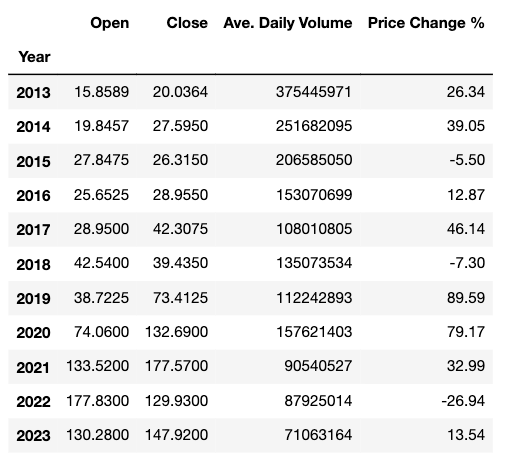

<h3>Follow the steps below to create one for your stock</h3>

<h3>Step 1: Reverse the order of the DataFrame</h3>

#### The dates in the DataFrame start from the most recent date and go back in time. Let's reverse the order so the dates are in chronological order.

In [20]:
# There are several ways to reverse a DataFrame. However, slicing is still the most effetive approach.
# df is the name of your own DataFrame. 

df_rev = df.loc[::-1].copy()

#### Print the first 10 rows to confirm the results.

In [21]:
df_rev.head(10)

,Date,Close,Volume,Open,High,Low
2516,2013-03-22,6.4150,4623428,6.3350,6.4475,6.2700
2515,2013-03-25,6.3450,8667416,6.4525,6.5425,6.3012
2514,2013-03-26,6.5900,14183732,6.4075,6.6000,6.3575
2513,2013-03-27,6.6125,12135088,6.5700,6.6675,6.5350
2512,2013-03-28,6.9925,39373408,6.3125,7.1675,6.3125
2511,2013-04-01,7.4400,28086272,7.0000,7.5175,6.9825
2510,2013-04-02,7.5600,16347856,7.4350,7.5850,7.2650
2509,2013-04-03,7.5625,18023412,7.5675,7.6525,7.5000
2508,2013-04-04,7.4725,17995200,7.5525,7.7750,7.3725
2507,2013-04-05,7.4900,11197824,7.4100,7.5175,7.3275


### Step 2: Extract the 'year' information from datetime data

#### Add a new column, 'Year', to the DataFrame. This is important for grouping by year.

In [22]:
df_rev['Year'] = df_rev['Date'].dt.year

#### Print the first 10 rows of the DataFrame to confirm the results.

In [23]:
df_rev.head(10)

,Date,Close,Volume,Open,High,Low,Year
2516,2013-03-22,6.4150,4623428,6.3350,6.4475,6.2700,2013
2515,2013-03-25,6.3450,8667416,6.4525,6.5425,6.3012,2013
2514,2013-03-26,6.5900,14183732,6.4075,6.6000,6.3575,2013
2513,2013-03-27,6.6125,12135088,6.5700,6.6675,6.5350,2013
2512,2013-03-28,6.9925,39373408,6.3125,7.1675,6.3125,2013
2511,2013-04-01,7.4400,28086272,7.0000,7.5175,6.9825,2013
2510,2013-04-02,7.5600,16347856,7.4350,7.5850,7.2650,2013
2509,2013-04-03,7.5625,18023412,7.5675,7.6525,7.5000,2013
2508,2013-04-04,7.4725,17995200,7.5525,7.7750,7.3725,2013
2507,2013-04-05,7.4900,11197824,7.4100,7.5175,7.3275,2013


### Step 3: Groupby the DataFrame by "Year"

In [24]:
df_year = df_rev.groupby('Year')
df_year.groups.keys()

dict_keys([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

#### Please show the number of trading days for each year from 2013 to 2023.

In [25]:
#Will go through each year in the "df_year" dictionary and 
#using .nunique() we can get the unique dates and count them for the year
for year, group in df_year:
    daysOfTrade = group['Date'].nunique()
    print(year, '\b:', daysOfTrade, "days")

2013 : 197 days
2014 : 252 days
2015 : 252 days
2016 : 252 days
2017 : 251 days
2018 : 251 days
2019 : 252 days
2020 : 253 days
2021 : 252 days
2022 : 251 days
2023 : 54 days


### Step 4: For each year, extract 'Open' price for the first trading day of the year and the 'Close' price for the last trading day of the year.

#### Note: this will require you to apply separate aggregate functions on 'Open' and 'Close' columns

In [26]:
df_summary = df_year.agg({'Open': 'first', 'Close': 'last'}) 

#### Print the DataFrame, df_summary, to confirm the results.

In [27]:
df_summary

,Open,Close
Year,,
2013,6.3350,12.3150
2014,12.2875,8.4500
2015,8.5150,7.0100
2016,6.7600,6.3150
2017,6.3600,4.4875
2018,4.4900,3.1550
2019,3.1125,1.5200
2020,1.5350,4.7100
2021,4.7500,37.0975


### Step 5: Add a new column, "Average Daily Volume", to df_summary, by calculating the mean of 'Volume' for each year.

#### Note: the data type of the average daily volume is integer.

In [28]:
#Adds Average Daily Volume. We use .astype to get full numbers and no exponeated numbers
df_summary['Average Daily Volume'] = df_year.agg({'Volume': 'mean'}).astype('int')

####  Print the DataFrame, df_summary, to confirm the results.

In [29]:
df_summary

,Open,Close,Average Daily Volume
Year,,,
2013,6.3350,12.3150,11992043
2014,12.2875,8.4500,13364643
2015,8.5150,7.0100,8254084
2016,6.7600,6.3150,10958088
2017,6.3600,4.4875,11438105
2018,4.4900,3.1550,16035375
2019,3.1125,1.5200,21926023
2020,1.5350,4.7100,26741613
2021,4.7500,37.0975,57329897


### Step 6: Add another new column, "Price Change %", to df_summary, by calculating the percentage change of the stock price for each year.

#### % change = (Close - Open)/Open * 100

In [30]:
#Calculates the price change and rounds by 2
df_summary['Price Change %'] = (df_summary['Close'] - df_summary['Open']) / df_summary['Open'] * 100
df_summary['Price Change %'] = df_summary['Price Change %'].round(2)

#### Print the DataFrame, df_summary. This is your final performance table.

In [31]:
df_summary

,Open,Close,Average Daily Volume,Price Change %
Year,,,,
2013,6.3350,12.3150,11992043,94.40
2014,12.2875,8.4500,13364643,-31.23
2015,8.5150,7.0100,8254084,-17.67
2016,6.7600,6.3150,10958088,-6.58
2017,6.3600,4.4875,11438105,-29.44
2018,4.4900,3.1550,16035375,-29.73
2019,3.1125,1.5200,21926023,-51.16
2020,1.5350,4.7100,26741613,206.84
2021,4.7500,37.0975,57329897,681.00


<h3>3: Buy-and-Hold: Investment Results After 10 Years</h3>
    
<h4> Assume you invested $1,000 in the stock on the first trading date of your dataset (say, 2013-2-28) and you continued to hold the stock.</h4>
<h4>What are the investment values at the end of each year from 2013 to 2023? </h4>

### Step 1: Calculate the yearly cumulative return

#### A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time.

#### Note: cumulative return % = (Close - Open[2013])/Open[2013] * 100 

#### Add an additional column, "Cumm Return %", to df_summary, that shows the yearly cumulative return of the stock.

In [32]:
#Calulates the Cummulative Return and rounds it by 2
df_summary['Cumm Return %'] = (df_summary['Close'] - df_summary.loc[2013]['Open']) / df_summary.loc[2013]['Open'] * 100
df_summary['Cumm Return %'] = df_summary['Cumm Return %'].round(2)

#### Print the DataFrame, df_summary, to show the result

In [33]:
df_summary

,Open,Close,Average Daily Volume,Price Change %,Cumm Return %
Year,,,,,
2013,6.3350,12.3150,11992043,94.40,94.40
2014,12.2875,8.4500,13364643,-31.23,33.39
2015,8.5150,7.0100,8254084,-17.67,10.66
2016,6.7600,6.3150,10958088,-6.58,-0.32
2017,6.3600,4.4875,11438105,-29.44,-29.16
2018,4.4900,3.1550,16035375,-29.73,-50.20
2019,3.1125,1.5200,21926023,-51.16,-76.01
2020,1.5350,4.7100,26741613,206.84,-25.65
2021,4.7500,37.0975,57329897,681.00,485.60


<h3>Step 2: Calculate the investment values</h3>

#### Using the cumulative returns, add a column, 'Investment Value', by calculating the year-end value of the initial $1,000 investment.

In [34]:
#With the use of an interest fomula, we can find the investment value of $1000 to start with.
df_summary['Investment Value'] = 1000 * (1 + df_summary['Cumm Return %'] / 100)

#### Print the DataFrame, df_summary, to show the result

In [35]:
df_summary

,Open,Close,Average Daily Volume,Price Change %,Cumm Return %,Investment Value
Year,,,,,,
2013,6.3350,12.3150,11992043,94.40,94.40,1944.0
2014,12.2875,8.4500,13364643,-31.23,33.39,1333.9
2015,8.5150,7.0100,8254084,-17.67,10.66,1106.6
2016,6.7600,6.3150,10958088,-6.58,-0.32,996.8
2017,6.3600,4.4875,11438105,-29.44,-29.16,708.4
2018,4.4900,3.1550,16035375,-29.73,-50.20,498.0
2019,3.1125,1.5200,21926023,-51.16,-76.01,239.9
2020,1.5350,4.7100,26741613,206.84,-25.65,743.5
2021,4.7500,37.0975,57329897,681.00,485.60,5856.0
